In [ ]:
apple = pd.read_csv('random')
apple['DateTime'] = apple['DateTime'].apply(lambda x: datetime.fromtimestamp(x))
oracle["Close"].asfreq('M').interpolate().plot()
# Creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
# Creating a datetimeindex without specifying start date and using periods
# Creating a DatetimeIndex with 8 periods ending on '1/4/2014'
dr3 = pd.date_range(end='1/4/2014', periods=8)
# Creating a datetimeindex specifying start date , end date and periods
dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
# Create a pd
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})

# autoregressive integrated moving average (ARIMA)
# Vector autoregression (VAR) is a stochastic process model used to capture the linear interdependencies among multiple time series
# UnobservedComponents
# Dynamic-factor models are flexible models for multivariate time series in which the observed endogenous variables are linear functions of exogenous covariates and unobserved factors

import statsmodels.api as sm

In [22]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

from datetime import datetime, timedelta


In [ ]:
import pandas as pd
stock_list = pd.read_csv('/Users/duynguyen/Documents/Git/Stock-Machine-Learning-Model/stock_list.csv')
stock_list.head()

In [ ]:
# Remove 1st row
# data = stock_list.iloc[1:]

# Fill na with most recent non-Nan preceding it
data = stock_list.fillna(method = "ffill")
data.head()

In [9]:
data.shape

(4417, 16)

In [ ]:
%%bash
# https://pypi.org/project/yahoofinancials/
pip install yahoofinancials

In [11]:
from yahoofinancials import YahooFinancials
from joblib import Memory

TMPDIR = '/tmp'
# Create Memory Object
memory = Memory(TMPDIR, verbose=0)

In [12]:
@memory.cache
def get_ticker_data(ticker: str, param_start_date, param_end_date) -> dict:
    raw_data = YahooFinancials(ticker)
    return raw_data.get_historical_price_data(param_start_date, param_end_date, "daily").copy()

def fetch_ticker_data(ticker: str, start_date, end_date) -> pd.DataFrame:
    # Business day
    date_range = pd.bdate_range(start=start_date, end=end_date)
    values = pd.DataFrame({'Date': date_range})
    values['Date'] = pd.to_datetime(values['Date'])
    raw_data = get_ticker_data(ticker, start_date, end_date)
    return pd.DataFrame(raw_data[ticker]["prices"])[['date', 'open', 'high', 'low', 'adjclose', 'volume']]    

In [15]:
DATASET_SOURCE = 'LIVE' # or 'COMPETITION_DATASET'
start_date = '2006-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

In [ ]:
%%time
if DATASET_SOURCE == 'LIVE':
    oracle = fetch_ticker_data('ORCL', start_date, end_date)
    oracle.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']
    # From UNIX to date time
    oracle['DateTime'] = oracle['DateTime'].apply(lambda x: datetime.fromtimestamp(x))
    # Fill
    oracle = oracle.fillna(method="ffill", axis=0)
    oracle = oracle.fillna(method="bfill", axis=0)
    # Set index
    oracle = oracle.set_index('DateTime')    
else:
    oracle = pd.read_csv('../input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/orcl.us.txt', index_col='Date', parse_dates=['Date'])
    oracle = oracle['2006':]

oracle['Name'] = 'ORCL'
oracle.head()

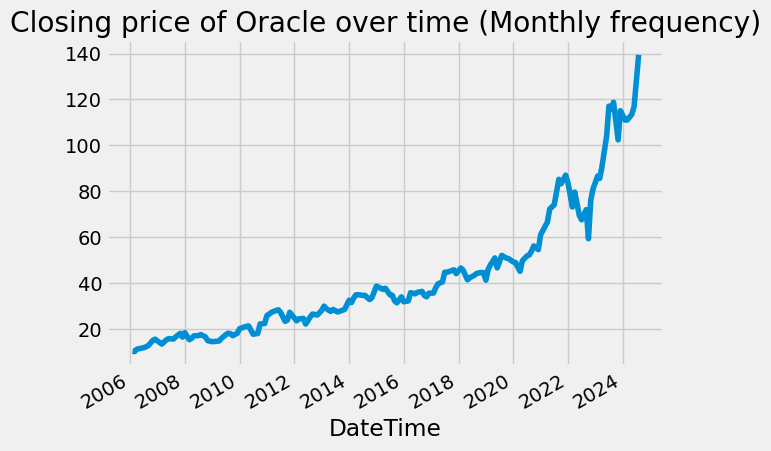

In [23]:
oracle["Close"].asfreq('M').interpolate().plot() # asfreq method is used to convert a time series to a specified frequency. 
                                                 # Here it is monthly frequency. Also using interpolate() to fix the gaps between the timeseries
plt.title('Closing price of Oracle over time (Monthly frequency)')
plt.show()

In [18]:
# We downsample from hourly to 3 day frequency aggregated using mean
# oracle_resampled = oracle.resample('3D').mean()
# oracle_resampled.head()

oracle.shape

(4678, 6)